In [1]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt

from rayopt import *

np.set_printoptions(precision=3)

Populating the interactive namespace from numpy and matplotlib


In [2]:
description = "oslo cooke triplet example 50mm f/4 20deg"
columns = "type roc distance radius material"
text = """
O 0       0     .364 AIR
S 21.25   5     6.5  SK16
S -158.65 2     6.5  AIR
S -20.25  6     5    F4
S 19.3    1     5    AIR
A 0       0     4.75 AIR
S 141.25  6     6.5  SK16
S -17.285 2     6.5  AIR
I 0       42.95 .364 AIR
"""

_description = "triplet 50mm f/4 20deg"
_columns = "type curvature distance radius material"
_text = """
O 0         0  .364 AIR
S .25285    5   1.8 1.62
S -.01474  .6   1.8 AIR
S -.1994 1.0654 1.3 1.621
S .25973  .15   1.3 AIR
A 0        .1   1.1 AIR
S .05065 1.0396 1.7 1.62
S -.24588  .6   1.7 AIR
I 0   8.27937     2 AIR
"""

_description = "photo triplet, f/2.7, f=100 U.S.-Pat 2,453,260 (1948-Pestrecov)"
_columns = "type distance roc diameter material"
_text = """
O 0      0   .25 AIR
S 20 40.94    20 1.617/55
S 8.74   0    20 AIR
S 11.05 -55.65 20 1.649/33.8
S 2.78 39.75  20 AIR
A 0      0    30 AIR
S 7.63 107.56 30 1.617/55
S 9.54 -43.33 30 AIR
I 79.34  0    30 AIR
"""

_description="cooke type triplet, USP 2453260 Pestrecov, Modern Optical Engineering, Smith"
_columns = "type roc distance radius material"
_text = """
    O      0     0   .3 AIR
    S  40.94    10   16 S-BSM9
    S      0  8.74   16 AIR
    S -55.65 10.05   14 S-TIM22
    A      0  2.78   12 S-TIM22
    S  39.75     0   14 AIR
    S 107.56  7.63 14.5 S-BSM9
    S -43.33  9.54 14.5 AIR
    I      0    90    0 AIR
"""

s = system_from_text(text, columns.split(),
    description=description)
s.object.angle = np.deg2rad(20)

s = system_from_yaml("""
description: "code v cooke triplet example 50mm f/4.5 20deg"
stop: 3
object: {angle_deg: 20, pupil: {radius: 5.55}}
elements:
- {material: air, radius: 10}
- {distance: 4, material: SCHOTT/SK16, roc: 21.48138, radius: 7}
- {distance: 2, material: air, roc: -124.1, radius: 7}
- {distance: 5.26, material: HOYA/F4, roc: -19.1, radius: 4.1}
- {distance: 1.25, material: air, roc: 22, radius: 4.1}
- {distance: 4.69, material: SCHOTT/SK16, roc: 328.9, radius: 7}
- {distance: 2.25, material: air, roc: -16.7, radius: 7}
- {distance: 43.050484, material: air}
""")

s = system_from_yaml("""
description: "smith triplet p444, 100mm f/8 23.4deg"
stop: 4
object: {angle_deg: 23.4, pupil: {radius: 6.25}}
elements:
- {material: air, radius: 20}
- {distance: 10, material: SCHOTT/SK4, roc: 40.1, radius: 17}
- {distance: 6, material: air, roc: -537.1, radius: 17}
- {distance: 10, material: SCHOTT/FN11, roc: -47.0, radius: 15}
- {distance: 1, material: air, roc: 40, radius: 15}
- {distance: 10.8, material: SCHOTT/SK4, roc: 234.5, radius: 16}
- {distance: 6, material: air, roc: -37.9, radius: 16}
- {distance: 85.3, material: air, radius: 45}
""")
s.update()
s.paraxial.focal_length_solve(100)
s.paraxial.update()
s.paraxial.refocus()

print(s)
#s.reverse()
#print(s)

System: smith triplet p444, 100mm f/8 23.4deg
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 23.4 deg
 Pupil:
   Pupil Distance: 28.5629
   Refractive Index: 1.00028
   Radius: 6.25
Image:
 Radius: 45
 Update Radius: True
 Pupil:
   Pupil Distance: -104.811
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 20.3004
Stop: 4
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf         40         basic/air   1.000   1.000   89.30
 1 S         10       40.1         34        SCHOTT/SK4   1.613   1.613   58.63
 2 S          6     -537.1         34         basic/air   1.000   1.000   89.30
 3 S         10        -47         30       SCHOTT/FN11   1.621   1.621   36.18
 4 S          1         40         30         basic/air   1.000   1.000   89.30
 5 S       10.8      234.5         32        SCHOTT/SK4   1.613   1.613   58.63
 6 S          6     -37.94         32         basic/air  

/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:185: RuntimeWarning: divide by zero encountered in true_divide
  return self.n.take((0, -2))/(2*na)
/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:190: RuntimeWarning: divide by zero encountered in true_divide
  return 1.22*self.wavelength/(2*na)/self.system.scale
/home/rj/work/nist/pyrayopt/rayopt/analysis.py:380: RuntimeWarning: invalid value encountered in true_divide
  xd = (a[1] - h)/h
/home/rj/work/nist/pyrayopt/rayopt/analysis.py:395: RuntimeWarning: invalid value encountered in true_divide
  z = -t.y[-1, :, 1]/tanarcsin(t.i[-1])[:, 1]
/usr/lib/python3/dist-packages/matplotlib/collections.py:631: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


System: smith triplet p444, 100mm f/8 23.4deg
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 23.4 deg
 Pupil:
   Pupil Distance: 28.5629
   Refractive Index: 1.00028
   Radius: 6.25
Image:
 Radius: 45
 Update Radius: True
 Pupil:
   Pupil Distance: -104.984
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 20.2931
Stop: 4
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf         40         basic/air   1.000   1.000   89.30
 1 S         10       40.1         34        SCHOTT/SK4   1.613   1.613   58.63
 2 S          6     -537.1         34         basic/air   1.000   1.000   89.30
 3 S         10        -47         30       SCHOTT/FN11   1.621   1.621   36.18
 4 S          1         40         30         basic/air   1.000   1.000   89.30
 5 S       10.8      234.5         32        SCHOTT/SK4   1.613   1.613   58.63
 6 S          6     -37.94         32         basic/air  

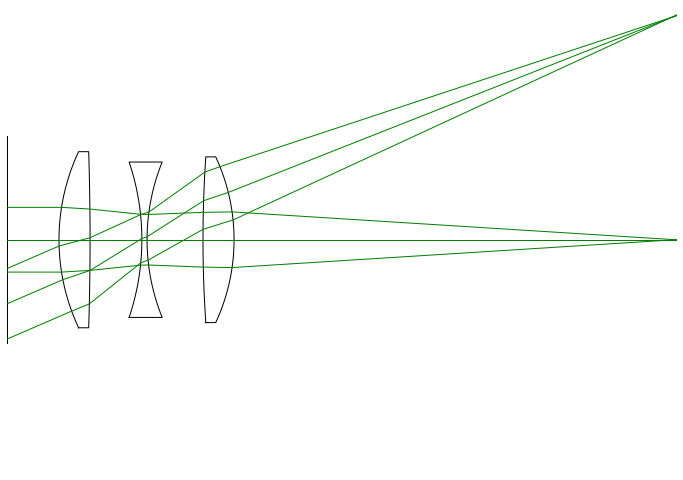

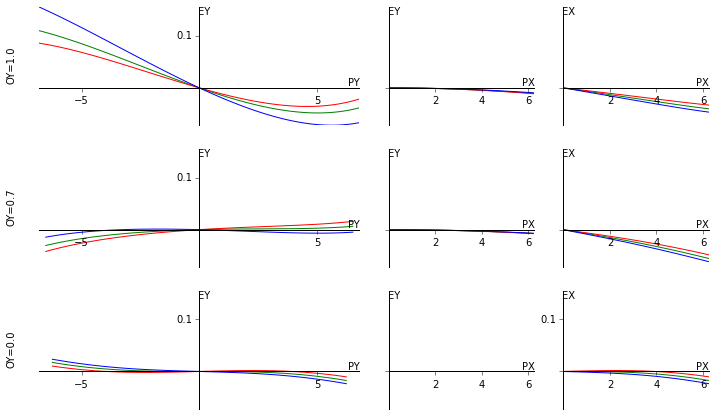

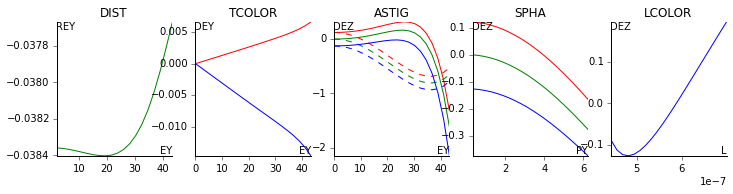

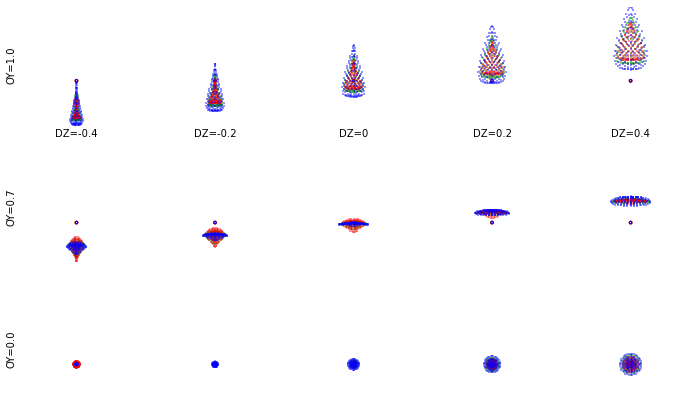

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


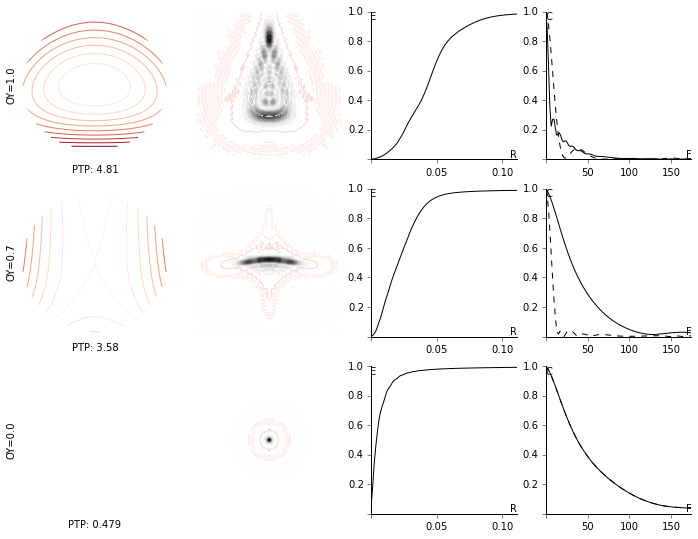

In [3]:
a = Analysis(s, refocus_full=False)

In [32]:
class GeomOp(Operand):
    def __init__(self, system, rays=13, *args, **kwargs):
        super(GeomOp, self).__init__(system, *args, **kwargs)
        self.t = [GeometricTrace(self.system) for f in self.system.fields]
        for t, f in zip(self.t, self.system.fields):        
            t.rays_point((0, f), nrays=rays, distribution="radau",
                         clip=False, filter=False)

    def get(self):
        for t, f in zip(self.t, self.system.fields):
            t.propagate()
        v = np.concatenate([
                (t.y[-1, 1:, :2] - t.y[-1, 0, :2])
                for t in self.t])/len(self.t)
        return np.where(np.isfinite(v), v, 100).ravel()


class PolyOp(Operand):
    def __init__(self, system, kmax=3, *args, **kwargs):
        super(PolyOp, self).__init__(system, *args, **kwargs)
        self.t = PolyTrace(self.system, kmax=kmax)
    
    def get(self):
        self.t.propagate()
        return self.t.stvwof[-1, :2, 1:].ravel()


s1 = system_from_yaml(system_to_yaml(s))
s1[1].material = s[5].material = Library.one().get("material", "LAK33")
s1[3].material = Library.one().get("material", "BASF2")
s1.update()
variables = []
variables.extend(PathVariable(s1, (i, "distance"), (2, 15))
                 for i in (2, 4, 6))
variables.extend(PathVariable(s1, (i, "distance"), (.1, 15))
                 for i in (3, 5))
variables.extend(PathVariable(s1, (i, "curvature"), (-1/20, 1/20))
                 for i in (1, 2, 3, 4, 5))

def get(s):
    s.update()
    s.paraxial.focal_length_solve(100)
    s.paraxial.propagate(start=-2)
    s.paraxial.refocus()
    s.paraxial.propagate(start=-1)
    s.paraxial.aberrations()        

operands = [
    FuncOp(s1, get),
    FuncOp(s1, lambda s: s[-1].offset[2:], min=60),
    FuncOp(s1, lambda s: s.edge_thickness()[1:], min=2),
    #FuncOp(s1, lambda s: np.diff(s.track), min=2),
    FuncOp(s1, lambda s: s.paraxial.seidel3[:, 5:].sum(0)*50, min=-1, max=1),
    GeomOp(s1, rays=13, weight=10),
    #PolyOp(s1, weight=1),
]

r, accept = optimize(variables, operands, tol=1e-5, options=dict(
        maxiter=100, disp=True, eps=1e-7, iprint=2))
accept()
# print(s.paraxial.seidel3.sum(0))
# print(s1.paraxial.seidel3.sum(0))
print(s1)

  NIT    FC           OBJFUN            GNORM
    1    12     7.864126E+01     7.211721E+03
    2    26     8.163068E+00     1.104686E+03
    3    39     1.449121E+01     1.538642E+03

/home/rj/work/nist/pyrayopt/rayopt/elements.py:366: RuntimeWarning: invalid value encountered in sqrt
  g = -a + np.sign(mu)*np.sqrt(np.square(a) - b)
/home/rj/work/nist/pyrayopt/rayopt/elements.py:495: RuntimeWarning: invalid value encountered in sqrt
  g = np.sqrt(np.square(d) - e*f)



    4    52     5.203577E+00     3.842355E+02
    5    65     6.777714E+00     1.109015E+03
    6    78     3.795644E+00     6.687220E+02
    7    92     2.759543E+00     1.800273E+02
    8   105     1.704454E+00     1.124790E+02
    9   117     4.831991E+00     1.196007E+03
   10   130     1.648062E+00     4.754092E+02
   11   143     5.254683E-01     2.085822E+02
   12   155     3.695233E-01     1.036937E+02
   13   169     3.622406E-01     7.170513E+01
   14   182     3.330971E-01     2.207584E+01
   15   194     3.309375E-01     2.909577E+01
   16   206     3.270747E-01     2.667538E+01
   17   218     3.155721E-01     1.006474E+01
   18   230     2.918485E-01     1.308852E+01
   19   242     2.867739E-01     7.023518E+01
   20   254     2.723086E-01     8.278943E+00
   21   266     2.660663E-01     9.499726E+00
   22   278     2.637041E-01     3.874511E+01
   23   290     2.606401E-01     7.662464E+00
   24   302     2.597361E-01     7.294045E+00
   25   314     2.589465E-01     

/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:185: RuntimeWarning: divide by zero encountered in true_divide
  return self.n.take((0, -2))/(2*na)
/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:190: RuntimeWarning: divide by zero encountered in true_divide
  return 1.22*self.wavelength/(2*na)/self.system.scale
/home/rj/work/nist/pyrayopt/rayopt/analysis.py:380: RuntimeWarning: invalid value encountered in true_divide
  xd = (a[1] - h)/h
/home/rj/work/nist/pyrayopt/rayopt/analysis.py:395: RuntimeWarning: invalid value encountered in true_divide
  z = -t.y[-1, :, 1]/tanarcsin(t.i[-1])[:, 1]
/usr/lib/python3/dist-packages/matplotlib/collections.py:631: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


System: smith triplet p444, 100mm f/8 23.4deg
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 23.4 deg
 Pupil:
   Pupil Distance: 20.5228
   Refractive Index: 1.00028
   Radius: 6.25
Image:
 Radius: 45
 Pupil:
   Pupil Distance: -99.3203
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 17.9935
Stop: 4
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf         40         basic/air   1.000   1.000   89.30
 1 S         10      39.36         34      SCHOTT/LAK33   1.754   1.754   52.43
 2 S     6.7485     -163.1         34         basic/air   1.000   1.000   89.30
 3 S     3.6195     -46.12         30      SCHOTT/BASF2   1.664   1.664   35.83
 4 S          2      39.51         30         basic/air   1.000   1.000   89.30
 5 S     7.3668     -98.42         32      SCHOTT/LAK33   1.754   1.754   52.43
 6 S     4.6413     -34.38         32         basic/air   1.000   1.000   89.3

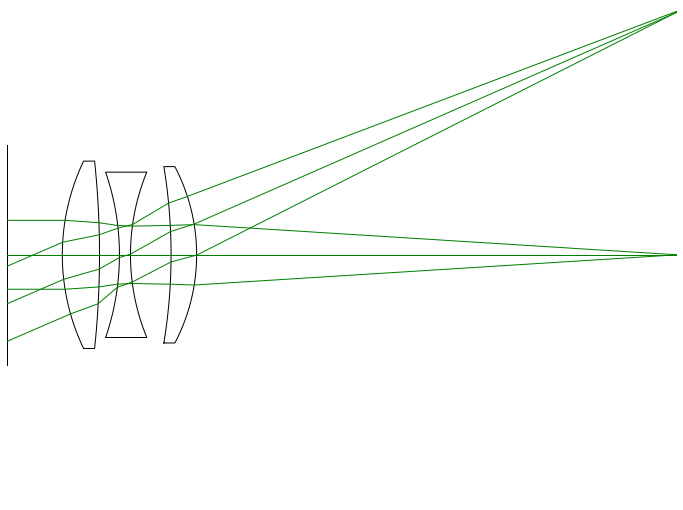

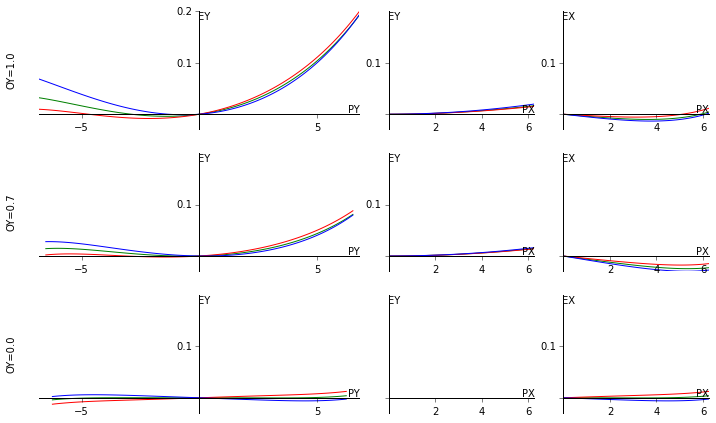

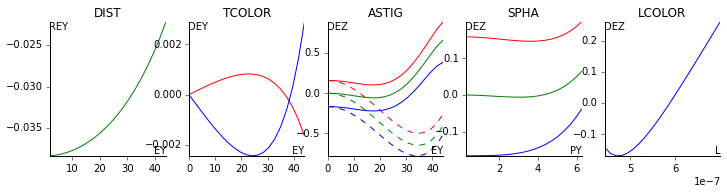

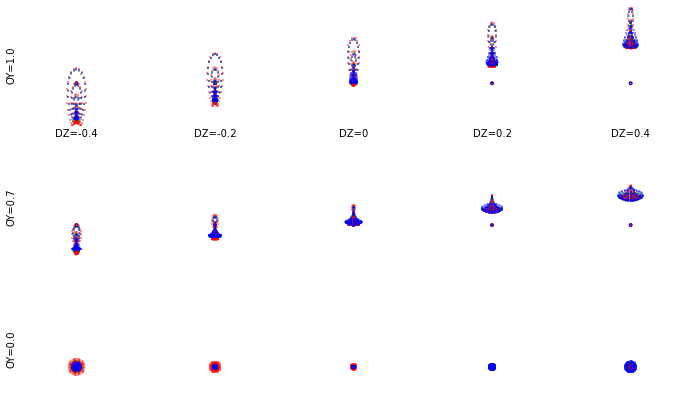

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


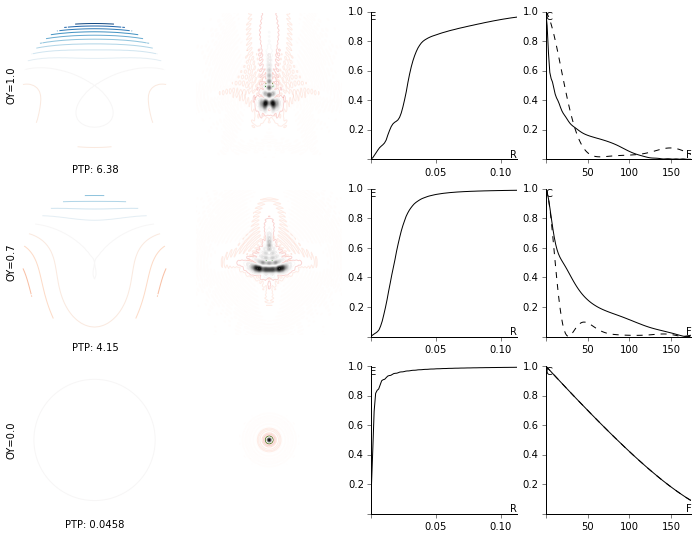

In [33]:
Analysis(s1, refocus_full=False)

In [305]:
print(operands[-1].t.stvwof[-1, :2, 1:])
print(operands[-1].t)

AttributeError: 'list' object has no attribute 'stvwof'

[ 0.356  0.356] (array([ 0.356+0.935j,  0.356+0.935j]), array([ 0.356-0.935j,  0.356-0.935j])) [ True  True] [ True  True]
[[ 0.5    0.5  ]
 [ 0.5    0.5  ]
 [ 0.482  0.482]
 [ 0.394  0.394]
 [ 0.39   0.39 ]
 [ 0.422  0.422]
 [ 0.431  0.431]
 [ 0.019  0.019]]
(array([[ 0.5  ,  0.5  ],
       [ 0.5  ,  0.5  ],
       [ 0.482,  0.482],
       [ 0.394,  0.394],
       [ 0.39 ,  0.39 ],
       [ 0.422,  0.422],
       [ 0.431,  0.431],
       [ 0.019,  0.019]]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]))
 # T     track    spot a    spot b  spot ang waistx dz waisty dz   waist x   waist y
 0 S         0       0.5       0.5         0         0         0       0.5       0.5
 1 S         4       0.5       0.5         0      56.1      56.1   0.01295   0.01295
 2 S         6    0.4822    0.4822         0     28.62     28.62    0.0111    0.0111
 3 S     11.26    0.3936    0.3936         0     151.8     151.8    0.0449    0.0449
 4 S     12.51    0.3904    0.3904         0    -57.15    -57.1

/home/rj/.local/lib/python3.5/site-packages/numpy/core/function_base.py:107: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/rj/.local/lib/python3.5/site-packages/numpy/core/function_base.py:112: RuntimeWarning: invalid value encountered in add
  y += start
/home/rj/.local/lib/python3.5/site-packages/numpy/lib/shape_base.py:431: FutureWarning: in the future np.array_split will retain the shape of arrays with a zero size, instead of replacing them by `array([])`, which always has a shape of (0,).
  FutureWarning)


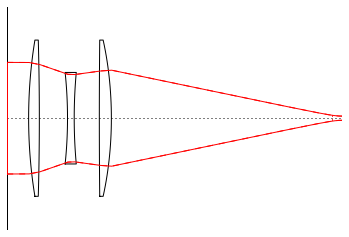

In [5]:
from rayopt import GaussianTrace
s.object = FiniteConjugate(radius=.5)
g = GaussianTrace(s)
g.is_proper()
print(g.m, g.eigenvalues, g.real, g.stable)
g.refocus()
#qi = g.qi[0]
#g.qi[0, 0] *= 2
#qi[0, 1] = qi[1, 0] = 1e-2-1e-5j
#g.rays(qi)
#g.propagate()
#print g.qi[-1]
r = g.spot_radius_at(None)
print(r)
print(g.spot_radius_at(z=None, normal=True))
#print 1/g.qi.real
#print g.eigenmodes
#g.rays(np.eye(2)*g.eigenmodes[0])

g.propagate()
#print g.qi
print(g)
print(g.spot_radius)

fig, ax = plt.subplots()
s.plot(ax)
g.plot(ax, color="red", waist=True, scale=10)
#ax.set_xlim(0, 70)
#ax.set_ylim(-5, .5)
ax.set_aspect("auto")
plt.show()

In [ ]:
from functools import lru_cache
from scipy.optimize import minimize


class Variable:
    def __init__(self, system, bounds=(-np.inf, np.inf),
                 scale=None, init=None):
        self.system = system
        if scale is None:
            range = bounds[1] - bounds[0]
            assert np.isfinite(range)
            scale = range
        self.scale = scale
        self.bounds = bounds
        if init is None:
            init = self.get()
        self.init = init
    
    def get(self):
        raise NotImplementedError
        
    def set(self, value):
        raise NotImplementedError


class PathVariable(Variable):
    def __init__(self, system, path, *args, **kwargs):
        self.path = path
        super(PathVariable, self).__init__(system, *args, **kwargs)
        
    def get(self):
        return self.system.get_path(self.path)
    
    def set(self, value):
        self.system.set_path(self.path, value)


class Operand:
    def __init__(self, system, weight=None, offset=0,
                 min=None, max=None):
        self.system = system
        self.weight = weight
        self.offset = offset
        self.min = min
        self.max = max

    def get(self):
        raise NotImplementedError

    def get_objective(self):
        if self.weight:
            yield lambda v: self.weight*(v - self.offset)
        
    def get_equality(self):
        if self.min is not None and self.min == self.max:
            yield lambda v: v - self.offset
        
    def get_inequality(self):
        if self.min is not None:
            yield lambda v: v - self.offset - self.min
        if self.max is not None:
            yield lambda v: self.max - (v - self.offset)


class FuncOp(Operand):
    def __init__(self, system, func, *args, **kwargs):
        super(FuncOp, self).__init__(system, *args, **kwargs)
        self.func = func
        
    def get(self):
        return np.atleast_1d(self.func(self.system)).ravel()


def opt(variables, operands, **kwargs):
    assert variables
    assert operands
    s = np.array([v.scale for v in variables])
    x0 = np.array([v.get() for v in variables])/s
    x1 = np.array([v.init for v in variables])/s
    bounds = np.array([v.bounds for v in variables])/s[:, None]

    ob, eq, ineq = [], [], []
    for i, op in enumerate(operands):
        for obi in op.get_objective():
            ob.append((i, obi))
        for eqi in op.get_equality():
            eq.append((i, eqi))
        for ineqi in op.get_inequality():
            ineq.append((i, ineqi))
    assert ob

    def up(x):
        for xi, vi in zip(x*s, variables):
            vi.set(xi)
    
    @lru_cache(maxsize=len(variables) + 1)
    def ex(*x):
        up(x)
        return [op.get() for op in operands]
    
    def fun(x):
        v = ex(*x)
        o = np.concatenate([obi(v[i]) for i, obi in ob])
        return np.square(o).sum()

    def feq(x):
        v = ex(*x)
        return np.concatenate([eqi(v[i]) for i, eqi in eq])
    
    def fineq(x):
        v = ex(*x)
        return np.concatenate([ineqi(v[i]) for i, ineqi in ineq])
    
    cons = []
    if eq:
        cons.append({"type": "eq", "fun": feq})
    if ineq:
        cons.append({"type": "ineq", "fun": fineq})

    r = minimize(fun, x1, bounds=bounds, constraints=cons, **kwargs)
    up(x0)
    if r.success:
        return r, lambda: up(r.x)
    else:
        raise ValueError(r)
